# Objective: 

* Explore the data and extract actionable insights using exploratory data analysis and perform statistical analysis of business data
* Prove (or disprove) that the medical claims made by the people who smoke is greater than those who don’t
* Prove (or disprove) with statistical evidence that the BMI of females is different from that of males
* Find if the proportion of smokers significantly different across different regions
* Find if the mean BMI of women with no children, one child, and two children the same
* **(by considering a significance level of 0.05 for all tests)**


# Data:
**Axisinsurance.csv** - it contains information about AxisInsurnace customers data.
* Age - This is an integer indicating the age of the primary beneficiary (excluding those above 64 years, since they are generally covered by the government).
* Sex - This is the policy holder's gender, either male or female.
* BMI - This is the body mass index (BMI), which provides a sense of how over or under-weight a person is relative to their height. BMI is equal to weight (in kilograms) divided by height (in meters) squared. An ideal BMI is within the range of 18.5 to 24.9.
* Children - This is an integer indicating the number of children / dependents covered by the insurance plan.
* Smoker - This is yes or no depending on whether the insured regularly smokes tobacco.
* Region - This is the beneficiary's place of residence in the U.S., divided into four geographic regions - northeast, southeast, southwest, or northwest.
* Charges - Individual medical costs billed to health insurance.

### Importing necessary libraries

In [23]:
#import necessary libraries
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Reading the Data

In [24]:
data = pd.read_csv("AxisInsurance.csv") #Reading the data file

In [25]:
#copying the data to another varaible to avoid any chnages to original data
df = data.copy()

### View the first and last 10 rows of the dataset

In [4]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [5]:
df.tail(10)

,age,sex,bmi,children,smoker,region,charges
1328,23,female,24.225,2,no,northeast,22395.74424
1329,52,male,38.600,2,no,southwest,10325.20600
1330,57,female,25.740,2,no,southeast,12629.16560
1331,23,female,33.400,0,no,southwest,10795.93733
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500
1337,61,female,29.070,0,yes,northwest,29141.36030


### Shape of the Dataset

In [6]:
df.shape

(1338, 7)

**Observations**

* This Dataset has 1338 rows and 7 columns.

### Dataframe Info

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


**Observations**

* Sex,Smoker and Region should be categorical varibales.

In [9]:
df.isnull().sum() # to findout null values in the dataset

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

**Observations**

* Found no null values

In [10]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

**Observations**
* Found no missing values.

### Data Preprocessing

#### Fixing the datatypes

In [26]:
# categorical columns should be converted in to categorical type

df['sex'] = df.sex.astype('category')
df['smoker'] = df.smoker.astype('category')
df['region'] = df.region.astype('category')

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1338 non-null   int64   
 1   sex       1338 non-null   category
 2   bmi       1338 non-null   float64 
 3   children  1338 non-null   int64   
 4   smoker    1338 non-null   category
 5   region    1338 non-null   category
 6   charges   1338 non-null   float64 
dtypes: category(3), float64(2), int64(2)
memory usage: 46.2 KB


* Fixed all the data type columns.

In [10]:
df.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


**Observtions**

* Sex and Smoker have 2 unique categories each.
* Region has 4 unique categories

### Univariate Analysis on Numerical Variables

In [11]:
def dist_boxplot(var, bins = None):
    f2, (ax_box, ax_dist) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)} 
                                           ) # creating the 2 subplots
    sns.boxplot(var, ax=ax_box, color='orange' ) # boxplot will be created
    sns.distplot(var, ax=ax_dist) # distplot will be created
    ax_dist.axvline(np.mean(var), color='red', linestyle='--') # Add mean to the histogram
    ax_dist.axvline(np.median(var), color='green', linestyle='-') # Add median to the histogram

#### Age

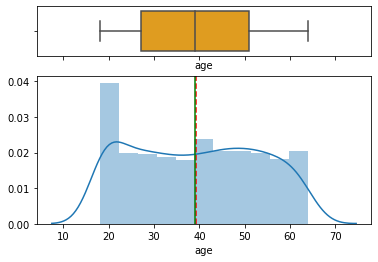

In [12]:
dist_boxplot(df.age)

**Observations**

* Distribution of age variable is not skewed to any particular side.
* No outliers in Age variable.
* Majority of people are in the 18 to 22 age group.

#### BMI

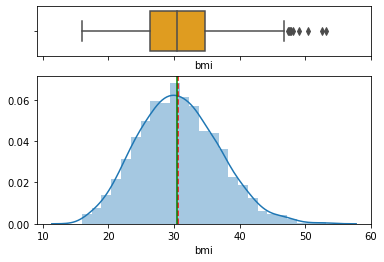

In [29]:
dist_boxplot(df.bmi)

**Observations**

* There are some outliers in BMI varibale.
* Distribution of BMI varibale is normally distributed.

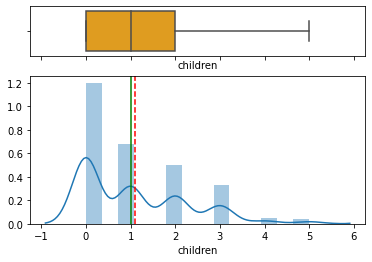

In [30]:
dist_boxplot(df.children)

**Observations**

* Distribution of Children variable is rightly skewed.
* Majority of people have no children.

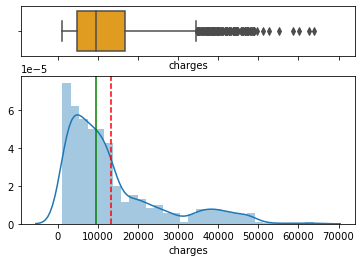

In [31]:
dist_boxplot(df.charges)

**Observations**

* There are  many outliers in Charges variable.
* Distribution of Charges variable is rightly skewed.
* Median is bit closer to 25th percentile.
* Most of the charges are below 13000.

### Univariate Analysis on Categorical Variables

In [32]:
def count_plot(var): # Creating a function for countplot.
    sns.countplot(x=var,data=df)

#### Analysis on sex

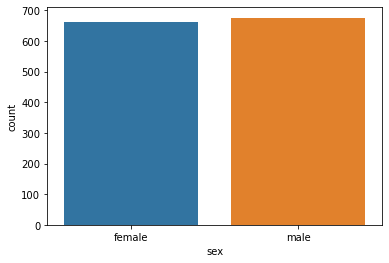

In [33]:
count_plot("sex")

**Observations**

* Male population is slightly higher than female.

#### Analysis on Smoker variable

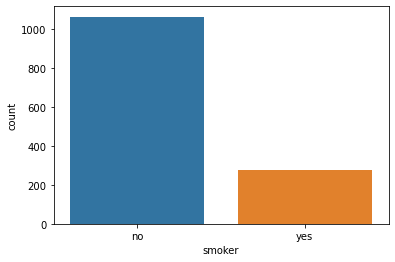

In [34]:
count_plot("smoker")

**Observations**

* Non-smokers are higher in number than the smokers.

#### Analysis on Region variable

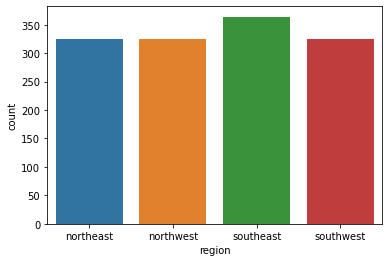

In [35]:
count_plot("region")

**Observations**

* Among 4 regions, southeast region has slightly higher population than other 3 regions.

## Bivariate and Multivariate Analysis

### Correlation on Age, BMI, Children & Charges

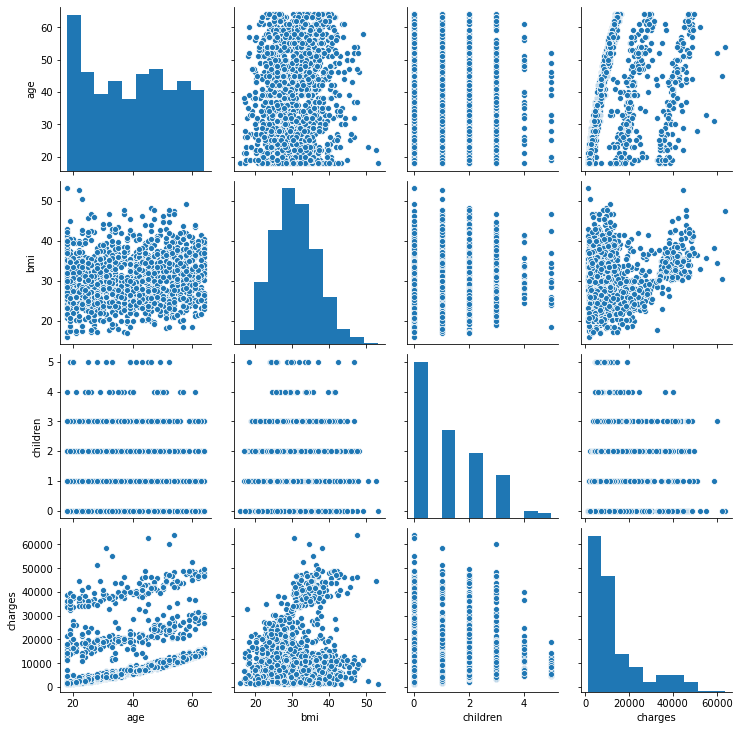

In [135]:
sns.pairplot(df)

#### Variables correlation by HeatMap 

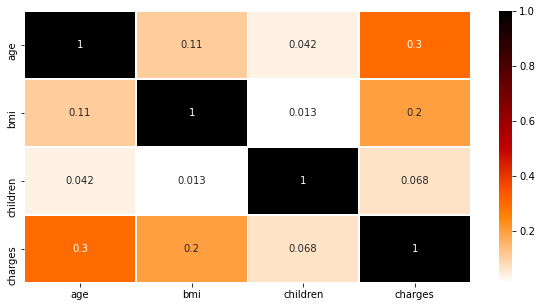

In [37]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,linewidth=.5,cmap="gist_heat_r")

**Observations**

* Age has correlation with charges; older people are billing more medical costs to the health insurance.
* BMI and charges also have some positive correlation. Higher BMI people are also billing medical costs to the health insurance.
* Age and BMI also have some correlation that needs to be investigated further.
* People with any number of children has almost no correlation with any other variables.

#### Sex VS BMI

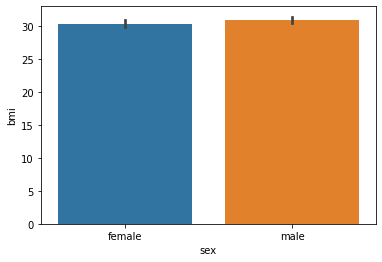

In [35]:
sns.barplot(x="sex", y="bmi",data=df)

**Observations**

* Average BMI of males is slightly higher than females.

#### Sex VS Charges

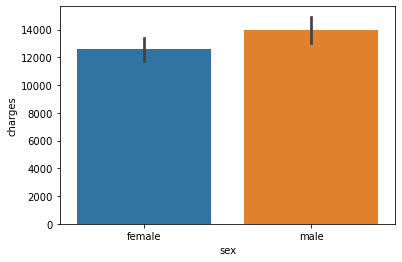

In [36]:
sns.barplot(x="sex", y="charges",data=df)

**Observations**

* Average insurnace charges of males are higher than females.

#### Sex VS Children

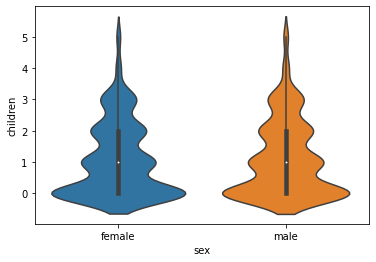

In [111]:
sns.violinplot(x="sex", y="children",data=df)

**Observations**

* No of children is no different for males Vs.females.

#### Smoker VS BMI

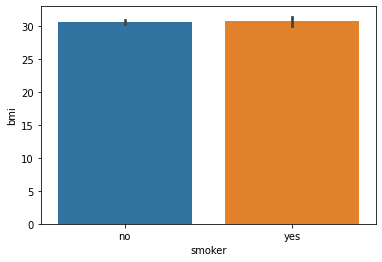

In [37]:
sns.barplot(x="smoker", y="bmi",data=df)

**Observations**

* No significance difference between average BMI of smokers and non-smokers.

#### Smoker VS Charges

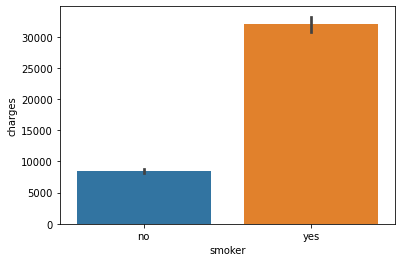

In [38]:
sns.barplot(x="smoker", y="charges",data=df)

**Observations**

* Average insurance charges of smokers are higher than non-smokers.

#### Age VS Sex

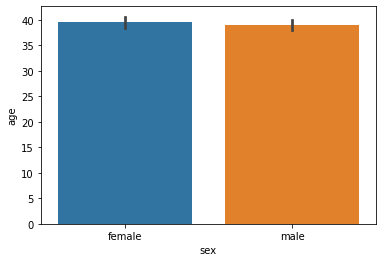

In [49]:
sns.barplot(x="sex", y="age",data=df)

**Observations**

* Average age of females is slightly higher than males.

#### Age VS Smoker

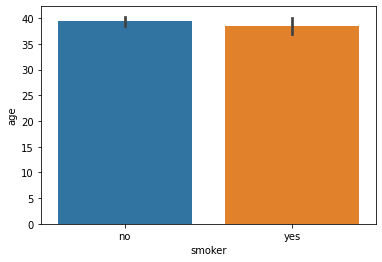

In [51]:
sns.barplot(x="smoker", y="age",data=df)

**Observations**

* Average age of non-smokers is slightly higher than the smoker's.

#### Age vs Charges

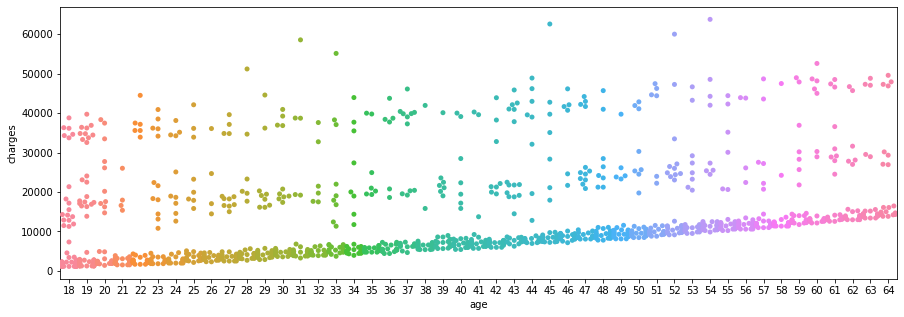

In [132]:
plt.figure(figsize=(15,5))
sns.swarmplot(x="age", y="charges",data=df)

**Observations**

* As the age of the person increases, insurance charges are also increasing. 

#### Age vs BMI

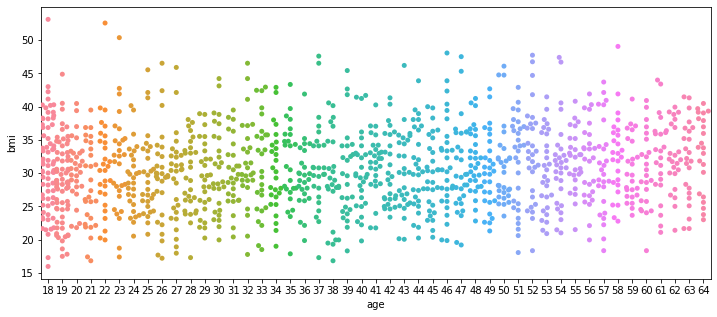

In [126]:
plt.figure(figsize=(12,5))
sns.swarmplot(x="age", y="bmi",data=df)

**Observations**

* BMI is spread across a wide range irrespective of the age of a person.

#### Region VS BMI VS Sex

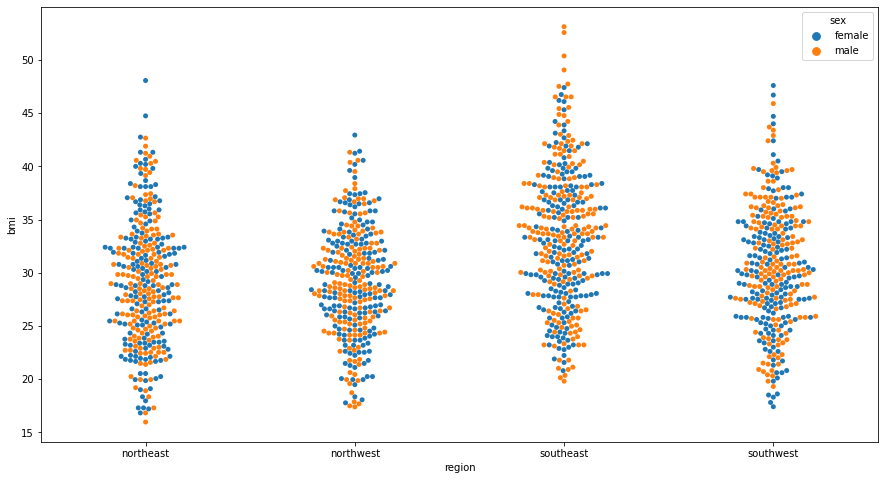

In [65]:
plt.figure(figsize=(15,8))
sns.swarmplot(x="region", y="bmi", hue="sex", data=df)

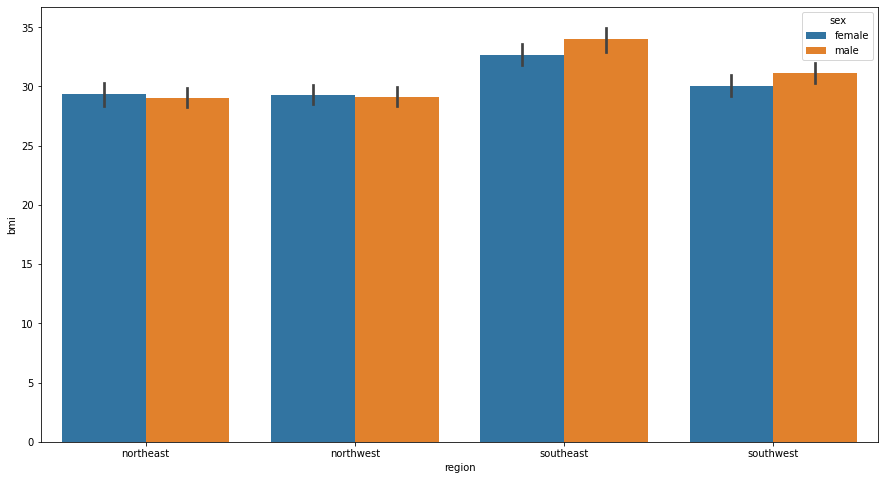

In [134]:
plt.figure(figsize=(15,8))
sns.barplot(x="region", y="bmi", hue="sex", data=df)

**Observations**

* Among the four regions, both males and females in the Southeast region have higher avg BMI, followed by Southwest region.
* Within the Southeast region, males have higher avg BMI than females. Similar trend is seen in Southwest region.
* Both Northeast and Northwest regions shows that females have slightly higher avg BMI than males.

#### Smoker VS BMI VS Sex

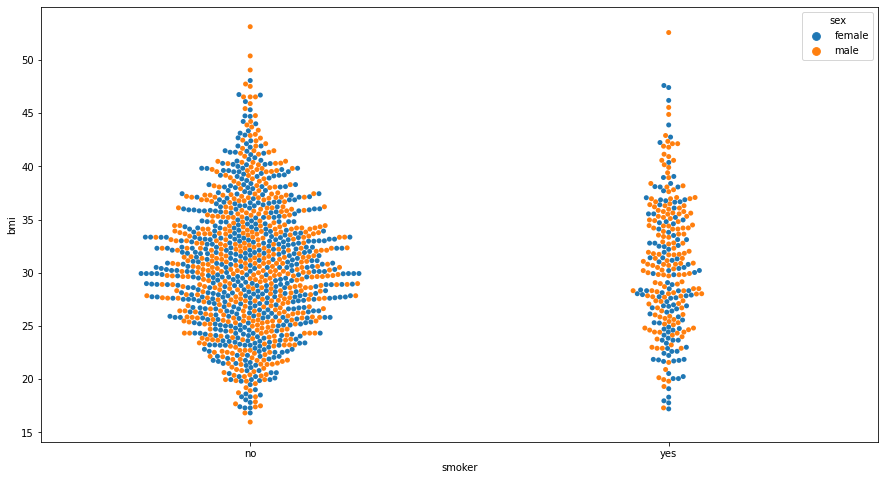

In [60]:
plt.figure(figsize=(15,8))
sns.swarmplot(x="smoker", y="bmi", hue="sex", data=df)

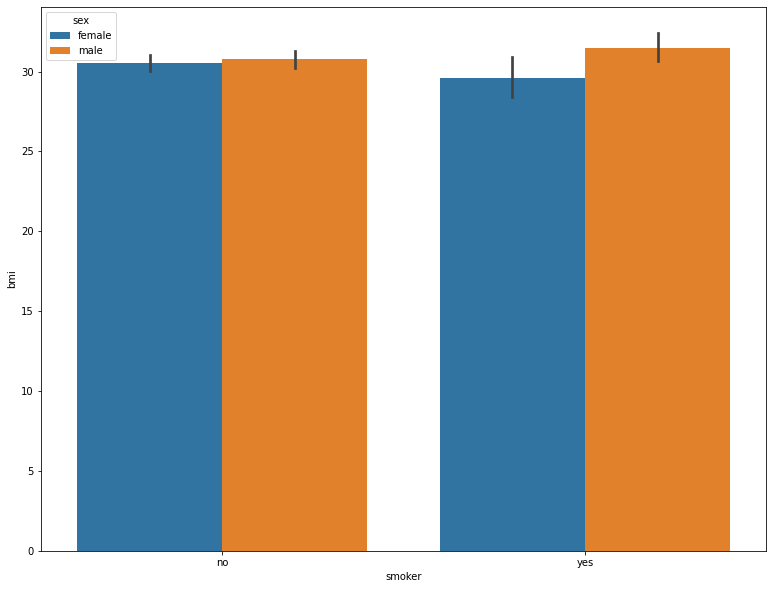

In [145]:
plt.figure(figsize=(13,10))
sns.barplot(x="smoker", y="bmi", hue="sex", data=df)

**Observations**

* There is no significant difference between male and females avg BMI among non-smokers.
* Avg male BMI is higher than female avg BMI among smokers.
* Avg female BMI of non-smokers have slightly higher avg BMI than smokers.

#### Children VS BMI VS Sex

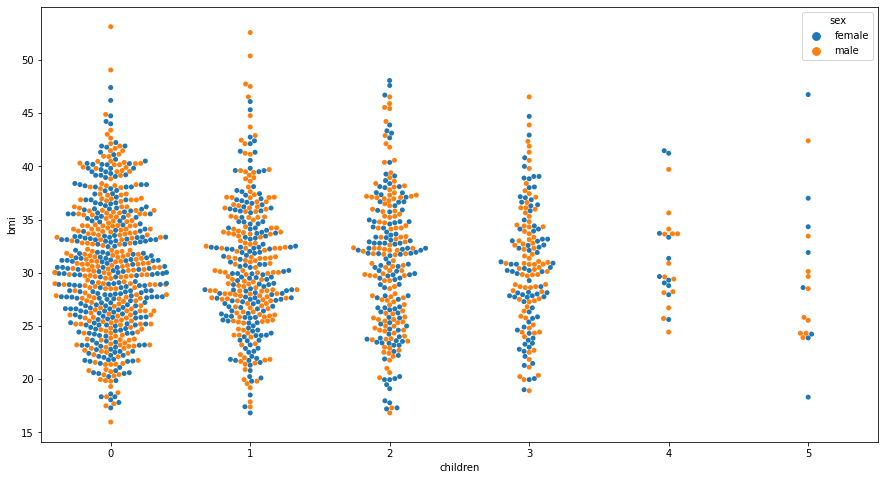

In [59]:
plt.figure(figsize=(15,8))
sns.swarmplot(x="children", y="bmi", hue="sex", data=df)

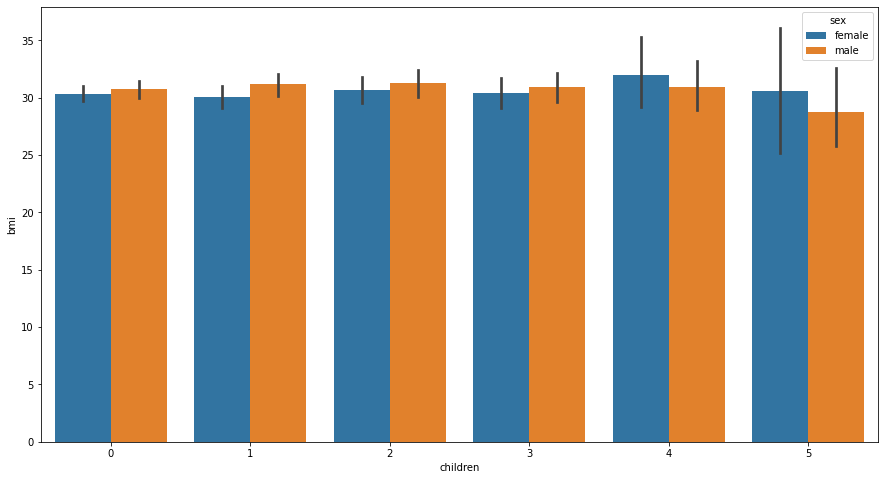

In [146]:
plt.figure(figsize=(15,8))
sns.barplot(x="children", y="bmi", hue="sex", data=df)

**Observations**

* Females with 4 or more children have a higher avg BMI compared to both, females with 3 or less children and males with 4 or more children.
* Males with 3 or less children have slightly higher avg BMI than females with 3 or less children.

#### Smoker VS Charges VS Sex

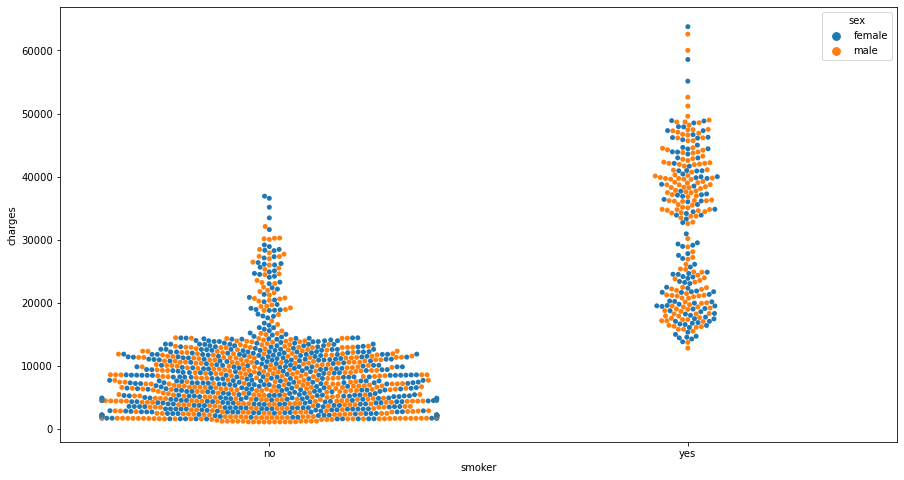

In [67]:
plt.figure(figsize=(15,8))
sns.swarmplot(x="smoker", y="charges", hue="sex", data=df)

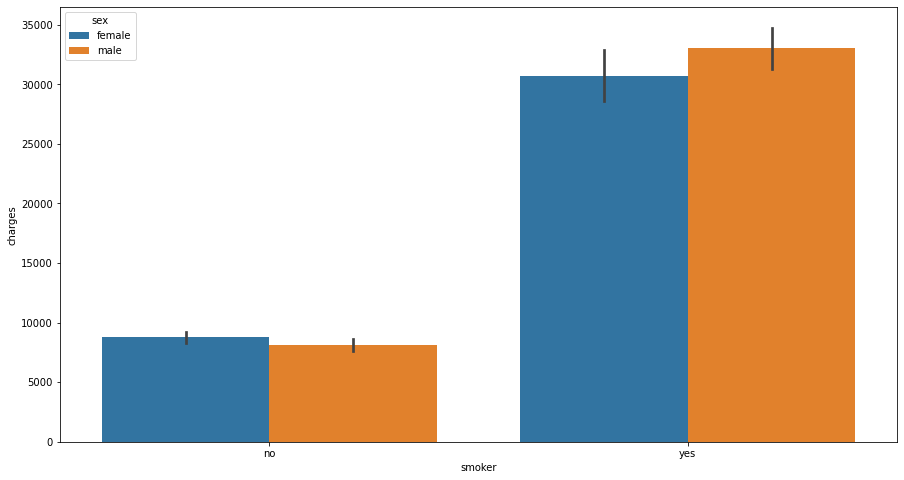

In [147]:
plt.figure(figsize=(15,8))
sns.barplot(x="smoker", y="charges", hue="sex", data=df)

**Observations**

* Avg insurnace charges for smokers is significantly higher than charges for non-smokers.
* Among smokers, avg charges for males is higher than females.
* Among, non-smokers, avg charges for females have slightly higher than males.

#### Region VS Charges VS Smoker

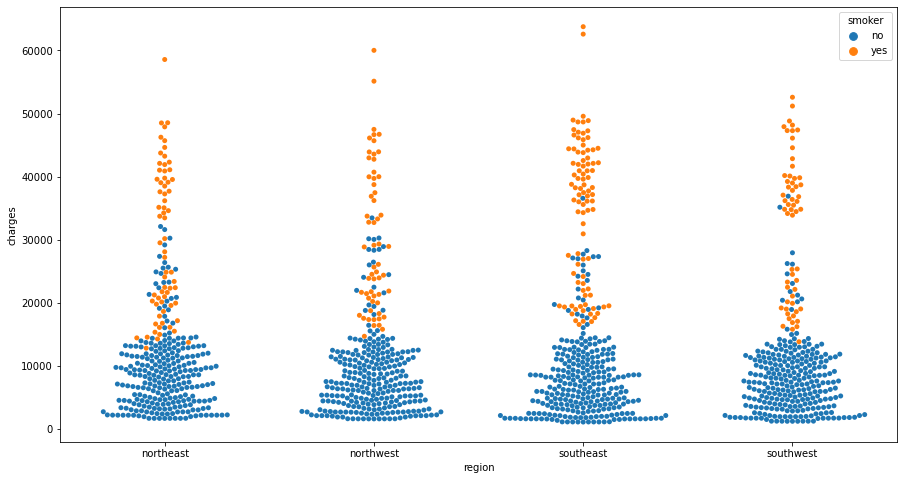

In [68]:
plt.figure(figsize=(15,8))
sns.swarmplot(x="region", y="charges", hue="smoker", data=df)

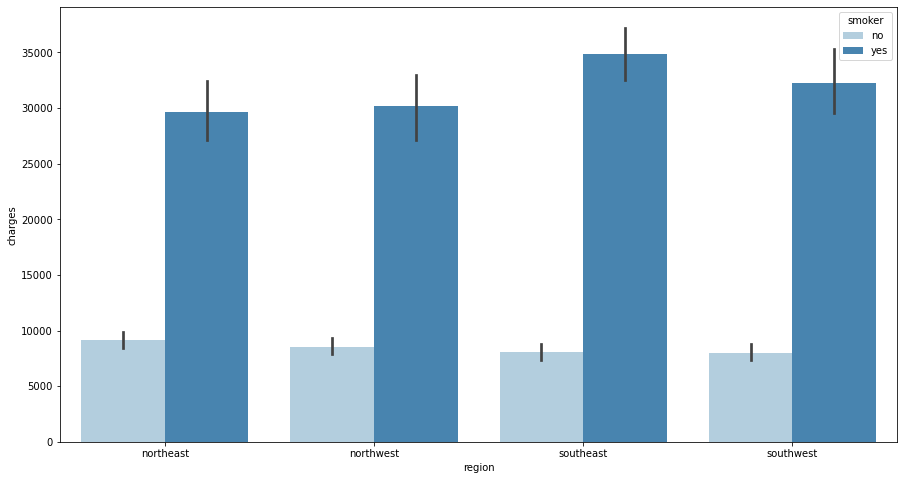

In [152]:
plt.figure(figsize=(15,8))
sns.barplot(x="region", y="charges", hue="smoker", data=df,palette = 'Blues')

**Observations**

* In all four regions, smokers avg insurance charges are higher than non-smokers.
* Non-smokers avg insurance charges are more or less same across all the four regions.
* Among smokers, southeast region avg insurnace charges are the highest followed by southwest.

#### Age VS Smoker VS Charges

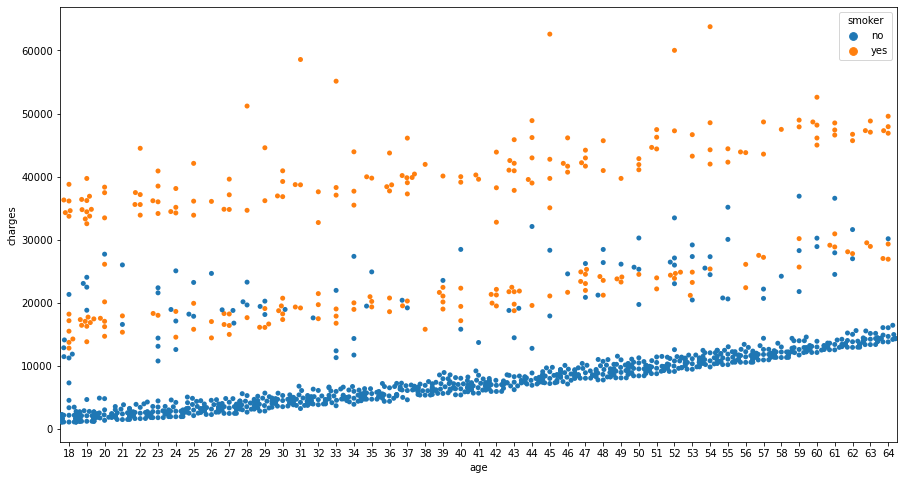

In [179]:
plt.figure(figsize=(15,8))
sns.swarmplot(x="age", y="charges", hue="smoker", data=df)

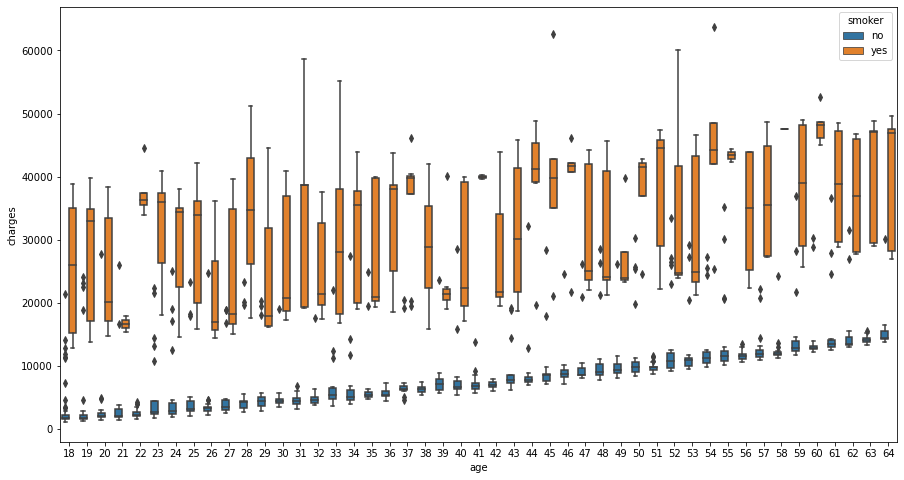

In [181]:
plt.figure(figsize=(15,8))
sns.boxplot(x="age", y="charges", hue="smoker", data=df)

**Observations**

* Charges increase with increase in age.
* Charges are higher for smokers than non-smokers.
* Younger-age non-smoker avg. charges are in the lower range and Older-age smoker avg. charges are in the higher-range (with some outliers). 

**=========================================================================================================================**

## Prove (or disprove) the medical claims made by the people who smoke is greater than those who don't

* Ho : ${smoker}_{claims}  <=  {NonSmoker}_{claims} - Null Hypothesis$ 

* Ha : ${smoker}_{claims} > {NonSmoker}_{claims}  - Alternate Hypothesis $

* Significance level - 0.05 (Alpha value)

 **Have to perform onetailed test**

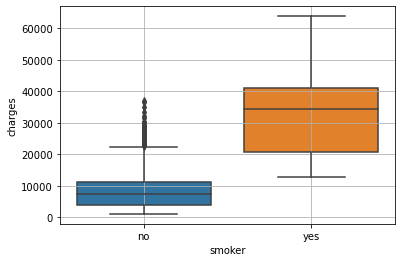

In [70]:
sns.boxplot(x="smoker", y="charges", data=df)
plt.grid()


#### Separating the data into 2 groups

In [198]:
S_claims = df[df['smoker'] == 'yes'].charges #smoker claims group
NS_claims = df[df['smoker']  == 'no'].charges #Non-smoker claims group

In [174]:
t, p_value = stats.ttest_ind(S_claims, NS_claims) #performing independent Ttest
print(t,  p_value) # to print t statistic value and p-value

46.664921172723716 8.271435842177219e-283


In [159]:
#The following is the pvalue for a one-tailed test.

(p_value/2)

4.1357179210886093e-283

In [175]:
print ('The T statistic is:',t,'\n''The corresponding pvalue is :',(p_value/2))

The T statistic is: 46.664921172723716 
The corresponding pvalue is : 4.1357179210886093e-283


In [176]:
alpha_value = 0.05 # Level of significance
print('Level of significance: %.2f' %alpha_value)
if p_value < alpha_value: 
    print('We have evidence to reject the null hypothesis since p value is less than the Level of significance')
else:
    print('We have no evidence to reject the null hypothesis since p value is greater than the Level of significance') 
    

Level of significance: 0.05
We have evidence to reject the null hypothesis since p value is less than the Level of significance


#### We reject the null hypothesis at 5% level of significance.

### So, at 95% confidence level, there is  sufficient evidence  to prove that medical claims made by the people who smoke is greater than who don't.

**=========================================================================================================================**

## Prove (or disprove) with statistical evidence that the BMI of females is different from that of males

* Ho: ${Females}_{BMI}$  =  ${Males}_{BMI} - Null Hypothesis$ 

* Ha: ${Females}_{BMI}$ $\neq$ ${Males}_{BMI}  - Alternate Hypothesis $

* Significance level - 0.05 (Alpha value)

 **Have to perform two-tailed test**

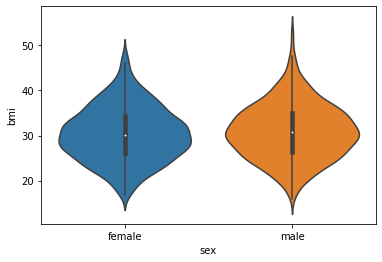

In [159]:
sns.violinplot(x="sex", y="bmi", data=df)

#### Separating the data into 2 groups

In [178]:
male_bmi = df[df['sex'] == 'male'].bmi 
female_bmi = df[df['sex'] == 'female'].bmi

In [179]:
t, p_value = stats.ttest_ind(male_bmi, female_bmi) #performing independent Ttest
print(t, p_value) # to print t statistic value and p-value

1.696752635752224 0.08997637178984932


In [180]:
print ('The T statistic is:',t,'\n''The corresponding pvalue is :',(p_value))

The T statistic is: 1.696752635752224 
The corresponding pvalue is : 0.08997637178984932


In [181]:
alpha_value = 0.05 # Level of significance
print('Level of significance: %.2f' %alpha_value)
if p_value < alpha_value: 
    print('We have evidence to reject the null hypothesis since p value is less than the Level of significance')
else:
    print('We have no evidence to reject the null hypothesis since p value is greater than the Level of significance') 
    

Level of significance: 0.05
We have no evidence to reject the null hypothesis since p value is greater than the Level of significance


#### We fail to reject the null hypothesis at 5% level of significance.

### So, at 95% confidence level, there is  sufficient evidence  to prove that BMI of females is equal to males. 

**=========================================================================================================================**

## Is the proportion of smokers significantly different across different regions

* Ho: Smokers are significantly not across the different regions - Null Hypothesis

* Ha: Smokers are significantly across the different regions  - Alternate Hypothesis 

* Significance level - 0.05 (Alpha value)

 **Have to perform two-tailed test**

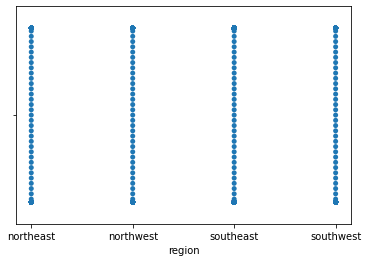

In [162]:
sns.swarmplot(x="region", hue="smoker", data=df)

In [188]:
c_table = pd.crosstab(df['smoker'], df['region']) #creating crosstab on smoker and region

In [186]:
chi, p_value, dof, expected =  stats.chi2_contingency(c_table) #performing chi2 contingency 

In [187]:
print(chi, p_value, dof, expected)

7.34347776140707 0.06171954839170547 3 [[257.65022422 258.44544096 289.45889387 258.44544096]
 [ 66.34977578  66.55455904  74.54110613  66.55455904]]


In [190]:
print ('The chi value:',chi,'\n''The corresponding pvalue is :',(p_value), '\n' 'Degree of freedom:', dof, '\n' 'Expected values:', expected)

The chi value: 7.34347776140707 
The corresponding pvalue is : 0.06171954839170547 
Degree of freedom: 3 
Expected values: [[257.65022422 258.44544096 289.45889387 258.44544096]
 [ 66.34977578  66.55455904  74.54110613  66.55455904]]


In [191]:
alpha_value = 0.05 # Level of significance
print('Level of significance: %.2f' %alpha_value)
if p_value < alpha_value: 
    print('We have evidence to reject the null hypothesis since p value is less than the Level of significance')
else:
    print('We have no evidence to reject the null hypothesis since p value is greater than the Level of significance') 
    

Level of significance: 0.05
We have no evidence to reject the null hypothesis since p value is greater than the Level of significance


#### We fail to reject the null hypothesis at 5% level of significance.

### So at 95% confidence level, there is  sufficient evidence  to prove that smokers are not significantly different across regions 

**=========================================================================================================================**

## Is the mean BMI of women with no children, one child, and two children the same

* Ho: $\mu_0c$ = $\mu_1c$ = $\mu_2c$- $Null Hypothesis$ 

* Ha: $\mu_0c$ $\neq$ $\mu_1c$ $\neq$ $\mu_2c$  - $Alternate Hypothesis $

* Significance level - 0.05 (Alpha value)

* 𝜇0𝑐 = Mean BMI of female with no children.
* 𝜇1𝑐  = Mean BMI of a female with 1 child.
* 𝜇2𝑐 = Mean BMI of a female with 2 children.


**Have to perform one-way Anova test**

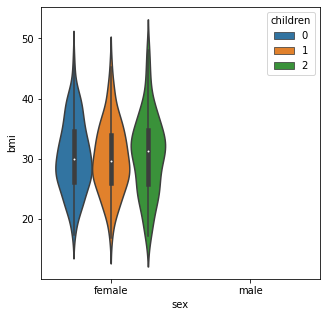

In [157]:
plt.figure(figsize=(5,5))
df_sf=df.loc[df['sex'] =='female'] # Seperating female data
df_c2=df_sf.loc[df_sf['children']<3] # Seperating female data with children<3
sns.violinplot(x='sex', y="bmi", hue="children" ,data=df_c2)

#### Separating the data into 3 groups

In [194]:
c_0 = female_bmi[df['children'] == 0] #Women with no children group
c_1 = female_bmi[df['children'] == 1] #Women with 1 children group
c_2 = female_bmi[df['children'] == 2] #Women with 2 children group

In [195]:
f_stat, p_value = stats.f_oneway(c_0, c_1, c_2) #performing one-way Anova test
print(f_stat, p_value) 

0.3344720147757968 0.7158579926754841


In [196]:
print ('The F statistic is:',f_stat,'\n''The corresponding pvalue is :',(p_value))

The F statistic is: 0.3344720147757968 
The corresponding pvalue is : 0.7158579926754841


In [197]:
alpha_value = 0.05 # Level of significance
print('Level of significance: %.2f' %alpha_value)
if p_value < alpha_value: 
    print('We have evidence to reject the null hypothesis since p value is less than the Level of significance')
else:
    print('We have no evidence to reject the null hypothesis since p value is greater than the Level of significance') 
    

Level of significance: 0.05
We have no evidence to reject the null hypothesis since p value is greater than the Level of significance


#### We fail to reject the null hypothesis at 5% level of significance.

### So at 95% confidence level, there is  sufficient evidence  to prove that the BMI of women with no children, one child, and two children are same

**=========================================================================================================================**

## Conclusion:

##### Based on the exploratory data analysis and statistical analysis, we can conclude the following insights from the Axis Insurance data set:

* There are more male smokers than female smokers in the given dataset, and insurance charges for smokers is significantly higher than that of non-smokers. Also, charges show an increasing trend with age. Therefore, charges are dependent on age & smoking-status.
* No significant correlation is observed for BMI with age or charges. However, it is observed that the Southeast region has the highest population, highest avg. BMI for both genders with males at a higher avg. than females, and that insurance charges for smokers is highest in this region compared to the rest.
* Medical claims made by the people who smoke is greater than those who don’t.
* BMI of females is not different from that of males.
* Proportion of smokers is not significantly different across different regions.
* Mean BMI of women with no children, one child, and two children is the same.